##  Creating Enviroment to test FOREX market strategies

    - Creating a python enviroment to test forex strategies.
    - The class should be able to receive new strategy as functions and then execute it logging the results.
The user should be able to create new strategies just by rewriting the methods __myStrategy_in__ and __myStrategy_out__.  This functions should return True or False indicating if the strategy should start the operations (or stop the operation )
    

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize'] = (12,9)
import seaborn as sns
from termcolor import colored

In [9]:
data ='/home/lucas/forex/data/DAT_MT_USDSGD_M1_2016.csv'

In [10]:
import pandas as pd
df = pd.read_csv(data, names = ["day", "time","open", "high", "low" , "close", "null"])


In [18]:
def mmd(dados,n=4):
    out = []
    for i, x in enumerate(dados):
        if i > n:
            out.append(np.mean(dados[i-n:i]))
        else:
            out.append(dados[n-1])
    return out

In [19]:
df.shape
#mmd(df['close'][:range_minutes]) 

(360764, 7)

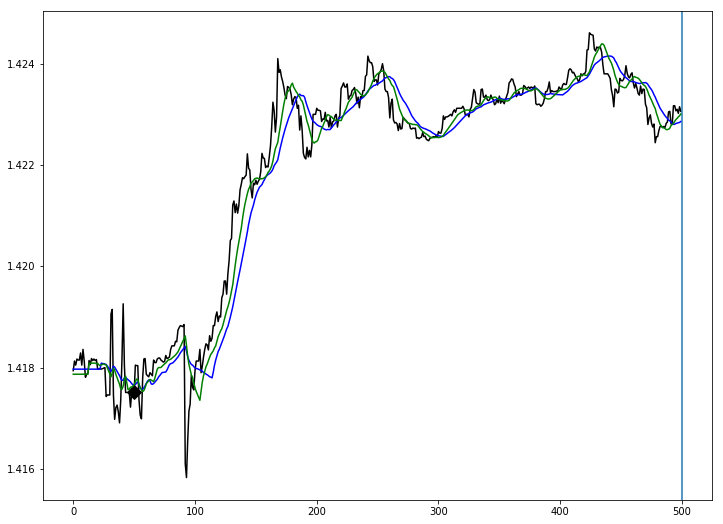

In [31]:
range_minutes = 500
plt.plot(df['close'][:range_minutes] ,'-gD' ,color='black',  markevery=[50], markersize=10)
plt.axvline(x=500)
plt.plot(mmd(df['close'][:range_minutes], 22) ,color='blue')
plt.plot(mmd(df['close'][:range_minutes], 12) ,color='green')
#plt.plot(df['close'][:range_minutes]) plotando duas cores



In [42]:
class Strategy:
    def __init__(self, data):
        self.data = data
        self.lucro = 0
        self.lucro_historico = []
        self.entradas = []
        self.entradas_index = []
        self.saidas_index = []
        self.saidas = []
        self.valores_passados = []
        self.valor_atual = None
        self.run()
        

    def myStrategy_in(self):
        #if self.valor_atual < (np.mean(self.valores_passados[-8:]) ):
        if self.valor_atual > np.mean(self.valores_passados[-12:]):
            if np.mean(self.valores_passados[-12:]) >  np.mean(self.valores_passados[-22:]):
                print self.valor_atual ,
                print 'm12', np.mean(self.valores_passados[-12:]), 
                print 'm24', np.mean(self.valores_passados[-22:])
                
                return True
            return False
        else:
            return False
        
    def myStrategy_out(self):
        if self.valor_atual < (self.entradas[-1]*0.9998) or self.valor_atual > (self.entradas[-1]) *1.0002:
            
            return True
        
        else:
            return False
        
    def lucro_troca(self):
        
        return (self.saidas[-1] - self.entradas[-1])
    
    def entrar(self, ind):
        self.entradas.append(self.valor_atual)
        self.entradas_index.append(ind)
    def sair(self, ind):
        self.saidas_index.append(ind)
        self.saidas.append(self.valor_atual)
        self.lucro += (self.saidas[-1] - self.entradas[-1])
        
    def strategy_execute(self, estrategia_entrada, estrategia_saida):
        [self.valores_passados.append(i) for i in self.data[:30].values]
        for ind, v in enumerate(self.data[30:].values): #ignorando os 30 primeiros valores
            self.valor_atual = v
            self.valores_passados.append(v)
            # procurando entrada
            if len(self.entradas)  == len(self.saidas):
                if estrategia_entrada():
                    print  'Entrou com: ', self.valor_atual, ind
                    self.entrar(ind)
            #procurar saida
            else:
                if estrategia_saida():
                    print  'Saiu com: ', self.valor_atual 
                    self.sair(ind)
                    self.lucro_historico.append(self.lucro)
                    if self.lucro_troca() > 0 :
                        print  colored('lucrou:  '  +str( abs(self.lucro) ), 'blue')
                    else:
                        print  colored('Perdeu:  ' +str( self.lucro ), 'red')
    def run(self):
        
        
        matplotlib.rcParams['figure.figsize'] = (12,5)

        self.strategy_execute(self.myStrategy_in, self.myStrategy_out)
        print colored('Lucro final:  ' +str( self.lucro ), 'green')
        plt.plot(self.valores_passados)
        print len(self.valores_passados)
        for e in self.entradas_index:
            plt.axvline(x=e, color='blue')
        for s in self.saidas_index:
            plt.axvline(x=s, color='red')
            
        plt.xlabel('time in minutes', fontsize=20)
        plt.ylabel('Currency Value', fontsize=20)

        plt.title('Strategy resume',  fontsize=25)
        
    

1.41926 m12 1.4178616666666668 m24 1.4178568181818183
Entrou com:  1.41926 12
Saiu com:  1.41806
Perdeu:  -0.0011999999999998678
1.41804 m12 1.4178333333333335 m24 1.4177481818181819
Entrou com:  1.41804 22
Saiu com:  1.41736
Perdeu:  -0.0018799999999998818
1.41783 m12 1.4177458333333333 m24 1.4177404545454544
Entrou com:  1.41783 33
Saiu com:  1.41816
lucrou:  0.0015499999999997183
1.41814 m12 1.4178674999999998 m24 1.4177272727272727
Entrou com:  1.41814 37
Saiu com:  1.4184299999999999
lucrou:  0.0012599999999998168
1.41842 m12 1.418245 m24 1.418161363636364
Entrou com:  1.41842 54
Saiu com:  1.41874
lucrou:  0.0009399999999999409
1.41878 m12 1.4184175000000003 m24 1.4182900000000003
Entrou com:  1.41878 58
Saiu com:  1.41583
Perdeu:  -0.003889999999999949
1.41821 m12 1.4179408333333334 m24 1.4178740909090908
Entrou com:  1.41821 78
Saiu com:  1.41857
lucrou:  0.003529999999999811
1.41852 m12 1.4183041666666665 m24 1.4177927272727273
Entrou com:  1.41852 84
Saiu com:  1.418839999999

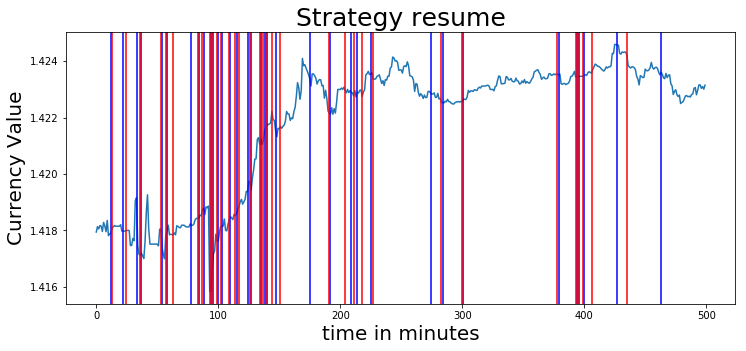

In [43]:
teste = Strategy(df['open'][:range_minutes])